In [686]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Capstone: Education Anaysis

This EDA is broken down into analysis of 3 different datasets. 

1. Citywide End of Year Attendance & Chronic Absenteeism Data for the school years 2016-17 to 2020-23.
2. Citywide Demographic Data
3. Graduation Results

## 1. Citywide End of Year Attendance & Chronic Absenteeism Data 
(2016-17 : 2020-23)

### Import Data

In [687]:
# Load DataFrame
absent_df = pd.read_csv("/Users/sa18/Desktop/Education-Capstone/data/2016-17_-_2020-23_Citywide_End-of-Year_Attendance_and_Chronic_Absenteeism_Data_20250604.csv")

This dataset shows citywide attendance and chronic absenteeism for New York City Public Schools. 

"Citywide" means all 5 boroughs of NYC: Bronx, Brooklyn, Manhattan, Queens and Staten Island.

The dataset cites attendance and absenteeism rates for the academic years: 
* 2016-17
* 2017-18
* 2018-19
* 2020-21 
* 2021-22
* 2022-23

Included in this dataset: 
* students in Districts 1-32 and 75(Special Education)
* Pre-K students in K-12 schools that offer Pre-K

Excluded from this dataset: 
* students in District 79 (Alternative Schools & Programs)
* charter schools
* home schooling
* home & hospital instruction
* NYC Early Education Centers
* District Pre-K Centers

Key Notes:
* attendance is attributed to the school the student attended at the time
* if a student attended multiple schools in a school year, the student will contribute data toward multiple schools
* due to the Covid-19 pandemic, data for the 2019-20 school year only shows attendance information for September 2019 thru March 13, 2020. 
* 2020-21 school year: due to the shift to hybrid learning, attendance data for the 2020-21 school year includes in-person and remote instruction. The fields `# Total Days`, `# Days Absent` and `# Days Present` include in-person and remote attendance.

Definitions:
* chronic abseentism: having an attendanc of 90% or less. In other words, being absent 10% or more, of the total days. Students must be enrolled for more than 10 days & must be present for atleast one day. 

### Data Understanding

In [688]:
# shape of DataFrame
absent_df.shape

(53607, 10)

This dataset has 10 columns and 53,607 rows.

In [689]:
absent_df.head(50)

,Grade,Category,Year,# Total Days,# Days Absent,# Days Present,% Attendance,# Contributing 10+ Total Days and 1+ Pres Day,# Chronically Absent,% Chronically Absent
0,All Grades,All Students,2018-19,30887,2278,28609,92.6,192,47,24.5
1,All Grades,All Students,2019-20,21101,1500,19601,92.9,204,58,28.4
2,All Grades,All Students,2020-21,32686,3931,28755,88.0,199,84,42.2
3,All Grades,All Students,2021-22,31663,4751,26912,85.0,190,113,59.5
4,All Grades,All Students,2022-23,32663,4159,28504,87.3,206,104,50.5
5,PK in K-12 Schools,All Students,2018-19,2104,245,1859,88.4,15,7,46.7
6,PK in K-12 Schools,All Students,2019-20,1490,198,1292,86.7,15,10,66.7
7,PK in K-12 Schools,All Students,2020-21,2830,467,2363,83.5,18,10,55.6
8,PK in K-12 Schools,All Students,2021-22,2812,598,2214,78.7,18,12,66.7
9,PK in K-12 Schools,All Students,2022-23,2136,336,1800,84.3,13,10,76.9


In [690]:
absent_df.tail(50)

,Grade,Category,Year,# Total Days,# Days Absent,# Days Present,% Attendance,# Contributing 10+ Total Days and 1+ Pres Day,# Chronically Absent,% Chronically Absent
53557,9,All Students,2018-19,29295,14362,14933,51.0,207,189,91.3
53558,9,All Students,2019-20,16879,9026,7853,46.5,177,158,89.3
53559,9,All Students,2020-21,33190,20891,12299,37.1,184,169,91.8
53560,9,All Students,2021-22,17190,9942,7248,42.2,120,116,96.7
53561,9,All Students,2022-23,16563,9275,7288,44.0,119,110,92.4
53562,10,All Students,2018-19,15839,6469,9370,59.2,102,85,83.3
53563,10,All Students,2019-20,11884,4634,7250,61.0,113,91,80.5
53564,10,All Students,2020-21,15378,9458,5920,38.5,79,72,91.1
53565,10,All Students,2021-22,21520,10231,11289,52.5,133,118,88.7
53566,10,All Students,2022-23,10676,4871,5805,54.4,73,63,86.3


In [691]:
# list the columns
absent_df.columns

Index(['Grade', 'Category', 'Year', '# Total Days', '# Days Absent',
       '# Days Present', '% Attendance',
       '# Contributing 10+ Total Days and 1+ Pres Day', '# Chronically Absent',
       '% Chronically Absent'],
      dtype='object')

In [692]:
# check DataFrame structure
absent_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 53607 entries, 0 to 53606
Data columns (total 10 columns):
 #   Column                                         Non-Null Count  Dtype 
---  ------                                         --------------  ----- 
 0   Grade                                          53607 non-null  object
 1   Category                                       53607 non-null  object
 2   Year                                           53607 non-null  object
 3   # Total Days                                   53607 non-null  int64 
 4   # Days Absent                                  53607 non-null  object
 5   # Days Present                                 53607 non-null  object
 6   % Attendance                                   53607 non-null  object
 7   # Contributing 10+ Total Days and 1+ Pres Day  53607 non-null  object
 8   # Chronically Absent                           53607 non-null  object
 9   % Chronically Absent                           53607 non-null

In [693]:
# check for missing values
absent_df.isnull().sum()

Grade                                            0
Category                                         0
Year                                             0
# Total Days                                     0
# Days Absent                                    0
# Days Present                                   0
% Attendance                                     0
# Contributing 10+ Total Days and 1+ Pres Day    0
# Chronically Absent                             0
% Chronically Absent                             0
dtype: int64

There are no missing values.

In [694]:
# describe the dataset's info and stats
absent_df.describe()


,# Total Days
count,5.360700e+04
mean,2.654513e+04
std,4.314677e+04
min,1.000000e+00
25%,8.036000e+03
50%,1.332000e+04
75%,2.304100e+04
max,1.024625e+06


In [695]:
columns = [
    '# Days Absent',
    '# Days Present',
    '% Attendance',
    '# Contributing 10+ Total Days and 1+ Pres Day',
    '# Chronically Absent',
    '% Chronically Absent'
]

for column in columns: 
    absent_df[column] = pd.to_numeric(absent_df[column], errors='coerce')

In [696]:
absent_df.describe()

,# Total Days,# Days Absent,# Days Present,% Attendance,# Contributing 10+ Total Days and 1+ Pres Day,# Chronically Absent,% Chronically Absent
count,5.360700e+04,51823.000000,51823.000000,51823.000000,51823.000000,51818.000000,51818.000000
mean,2.654513e+04,2626.726646,24566.154430,89.626953,176.893599,55.077000,35.026196
std,4.314677e+04,4632.434137,39745.354936,5.540961,279.230565,87.779703,18.847172
min,1.000000e+00,3.000000,502.000000,37.100000,5.000000,0.000000,0.000000
25%,8.036000e+03,708.000000,7419.500000,86.900000,56.000000,16.000000,20.000000
50%,1.332000e+04,1234.000000,12175.000000,90.700000,90.000000,28.000000,33.700000
75%,2.304100e+04,2415.000000,21551.000000,93.500000,150.000000,52.000000,48.200000
max,1.024625e+06,132638.000000,973985.000000,99.900000,6043.000000,1735.000000,100.000000


In [697]:
# check for duplicates
absent_df.duplicated().sum()

305

In [698]:
# check for unique values in each column
absent_df.nunique()

Grade                                               15
Category                                             1
Year                                                 5
# Total Days                                     29748
# Days Absent                                     9710
# Days Present                                   28254
% Attendance                                       434
# Contributing 10+ Total Days and 1+ Pres Day     1605
# Chronically Absent                               697
% Chronically Absent                               940
dtype: int64

### Analysis of Attendance Pre-Covid and Post-Covid
* Pre-Covid School Years: 2016-17, 2017-18, 2018-19
* Mid-Covid School Years: 2019-20, 2020-21
* Post-Covid School Years: 2021-22, 2022-23

In [699]:
absent_df['Grade'] = absent_df['Grade'].astype(str).str.strip()
citywide = absent_df[absent_df['Grade'] == 'All Grades']

In [700]:
# filter to show Citywide attendance for All Grades
citywide = absent_df[absent_df['Grade'] == 'All Grades']

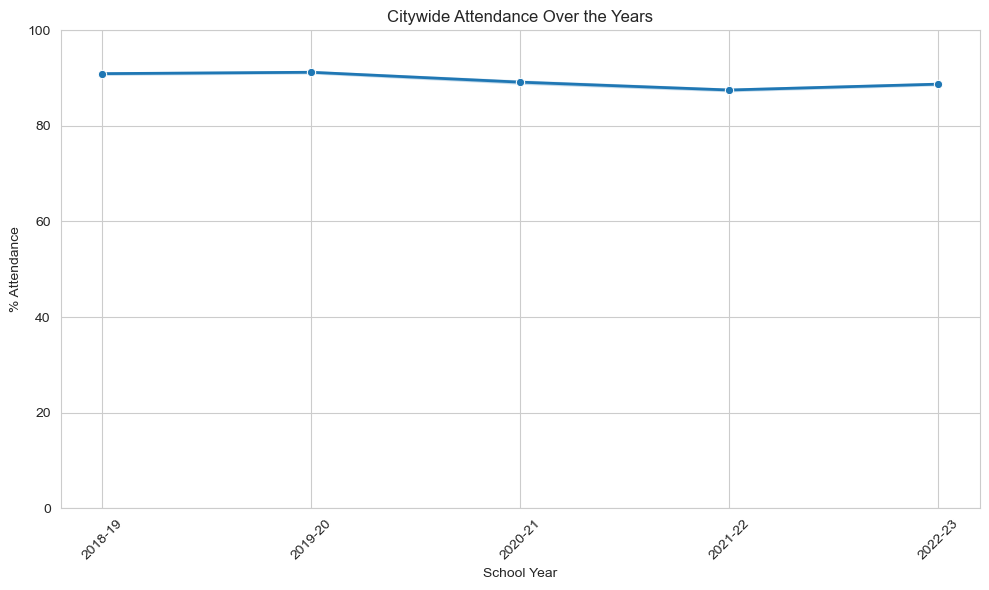

In [701]:
plt.figure(figsize=(10,6))
sns.lineplot(data=subset, x='Year', y='% Attendance', marker='o', linewidth=2)
plt.title('Citywide Attendance Over the Years')
plt.ylim(0,100)
plt.ylabel('% Attendance')
plt.xlabel('School Year')
plt.xticks(rotation=45)
plt.grid(True)
plt.tight_layout()
plt.show()

Attendance remained fairly stable going into the 2019-20 school year but it began declining soon into the year. This decline would coincide with the onset of Covid-19. The decline is most notable in middle to end of 2019-20 and the beginning of 2020-21. Schools were operating on a hybrid and remote learning model in the 2020-21 school year.

Attendance seems to have started rising in the post-Covid era of 2021-22 school year; but attendance has not reached or surpassed the pre-Covid levels. 

This data suggests that the pandemic's impact on student attendance has been a ripple affect. 

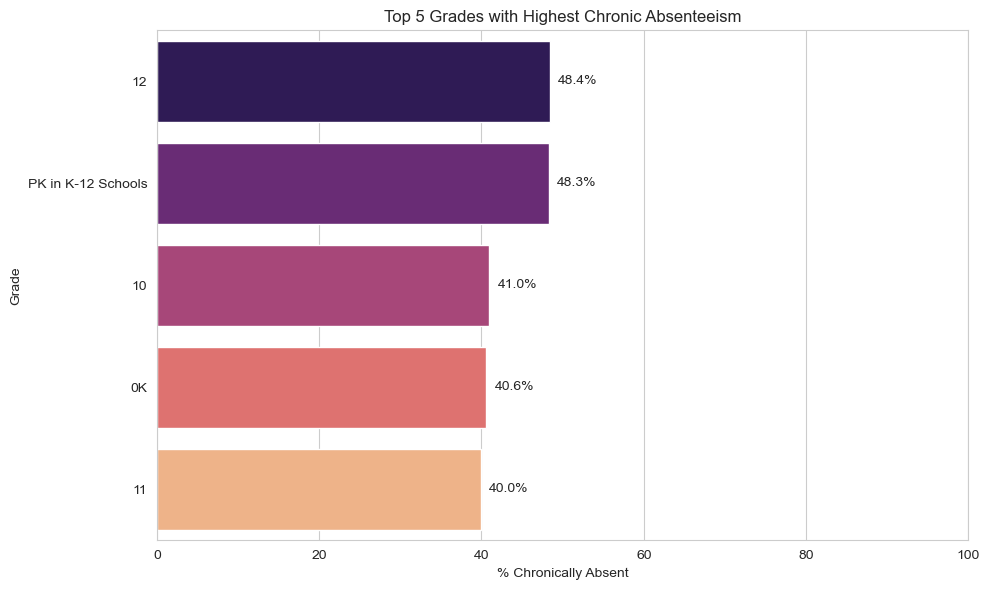

In [702]:
# Make sure the data types are correct
absent_df['% Chronically Absent'] = pd.to_numeric(absent_df['% Chronically Absent'], errors = 'coerce')
absent_df['Grade'] = absent_df['Grade'].astype(str).str.strip()

# Get Top 5 Grades with Highest Average Chronic Absenteeism
top5 = (
    absent_df[absent_df['Grade'] != 'All Grades']
    .groupby('Grade')['% Chronically Absent']
    .mean()
    .sort_values(ascending=False)
    .head(5)
    )

top5_df = top5.reset_index()
top5_df.columns = ['Grade', '% Chronically Absent']

# Plot data with hue and magma palette
plt.figure(figsize=(10,6))
sns.barplot(
    data=top5_df,
    x='% Chronically Absent',
    y='Grade',
    hue='Grade',
    palette='magma',
    legend=False
)

# Add labels
for i, value in enumerate(top5.values):
    plt.text(value +1, i, f"{value:.1f}%", va='center')

plt.title('Top 5 Grades with Highest Chronic Absenteeism')
plt.xlabel('% Chronically Absent')
plt.xlim(0,100)
plt.ylabel('Grade')
plt.tight_layout()
plt.show()

## 2. Citywide Demographic Data

### Import Data

In [703]:
# Load DataFrame
demo_df = pd.read_csv("/Users/sa18/Desktop/Education-Capstone/data/2019-20_Demographic_Snapshot_-_Citywide_20250604.csv")

In [704]:
demo_df.shape

(5, 37)

There are 37 rows and 5 columns in this dataset. 

In [705]:
demo_df.head()

,Year,Total Enrollment,Grade 3K+PK (Half Day & Full Day),Grade K,Grade 1,Grade 2,Grade 3,Grade 4,Grade 5,Grade 6,...,% Multiple Race Categories Not Represented,# White,% White,# Students with Disabilities,% Students with Disabilities,# English Language Learners,% English Language Learners,# Poverty,% Poverty,Economic Need Index
0,2015-16,1133963,71847,84386,87804,86930,85309,81287,79581,76798,...,0.021,167465,0.148,222496,0.196,142506,0.126,801696,0.707,0.621
1,2016-17,1141232,72553,82517,86008,86279,85050,84185,80563,78985,...,0.023,169803,0.149,228347,0.200,153466,0.134,800985,0.702,0.610
2,2017-18,1135334,71528,81588,83578,83978,84363,83367,83277,79114,...,0.025,170417,0.150,231910,0.204,153661,0.135,856483,0.754,0.719
3,2018-19,1126501,73904,78627,81908,81205,81706,82510,82044,81289,...,0.027,169583,0.151,234497,0.208,148815,0.132,834003,0.740,0.713
4,2019-20,1131868,87480,78587,79171,80298,79555,80287,81513,80250,...,0.031,170370,0.151,230983,0.204,142386,0.126,821883,0.726,0.719


In [706]:
demo_df.columns

Index(['Year', 'Total Enrollment', 'Grade 3K+PK (Half Day & Full Day)',
       'Grade K', 'Grade 1', 'Grade 2', 'Grade 3', 'Grade 4', 'Grade 5',
       'Grade 6', 'Grade 7', 'Grade 8', 'Grade 9', 'Grade 10', 'Grade 11',
       'Grade 12', '# Female', '% Female', '# Male', '% Male', '# Asian',
       '% Asian', '# Black', '% Black', '# Hispanic', '% Hispanic',
       '# Multiple Race Categories Not Represented',
       '% Multiple Race Categories Not Represented', '# White', '% White',
       '# Students with Disabilities', '% Students with Disabilities',
       '# English Language Learners', '% English Language Learners',
       '# Poverty', '% Poverty', 'Economic Need Index'],
      dtype='object')

In [707]:
demo_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5 entries, 0 to 4
Data columns (total 37 columns):
 #   Column                                      Non-Null Count  Dtype  
---  ------                                      --------------  -----  
 0   Year                                        5 non-null      object 
 1   Total Enrollment                            5 non-null      int64  
 2   Grade 3K+PK (Half Day & Full Day)           5 non-null      int64  
 3   Grade K                                     5 non-null      int64  
 4   Grade 1                                     5 non-null      int64  
 5   Grade 2                                     5 non-null      int64  
 6   Grade 3                                     5 non-null      int64  
 7   Grade 4                                     5 non-null      int64  
 8   Grade 5                                     5 non-null      int64  
 9   Grade 6                                     5 non-null      int64  
 10  Grade 7           

In [708]:
# check for missing values
demo_df.isnull().sum()

Year                                          0
Total Enrollment                              0
Grade 3K+PK (Half Day & Full Day)             0
Grade K                                       0
Grade 1                                       0
Grade 2                                       0
Grade 3                                       0
Grade 4                                       0
Grade 5                                       0
Grade 6                                       0
Grade 7                                       0
Grade 8                                       0
Grade 9                                       0
Grade 10                                      0
Grade 11                                      0
Grade 12                                      0
# Female                                      0
% Female                                      0
# Male                                        0
% Male                                        0
# Asian                                 

In [709]:
# describe the dataset's info and stats
demo_df.describe()

,Total Enrollment,Grade 3K+PK (Half Day & Full Day),Grade K,Grade 1,Grade 2,Grade 3,Grade 4,Grade 5,Grade 6,Grade 7,...,% Multiple Race Categories Not Represented,# White,% White,# Students with Disabilities,% Students with Disabilities,# English Language Learners,% English Language Learners,# Poverty,% Poverty,Economic Need Index
count,5.000000e+00,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.00000,5.000000,5.000000,...,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000
mean,1.133780e+06,75462.400000,81141.000000,83693.800000,83738.000000,83196.600000,82327.200000,81395.60000,79287.200000,77958.800000,...,0.025400,169527.600000,0.149800,229646.600000,0.202400,148166.800000,0.130600,823010.000000,0.725800,0.676400
std,5.353043e+03,6779.870006,2523.208374,3387.752825,2956.046092,2487.013932,1566.082118,1410.66183,1677.172233,1836.713832,...,0.003847,1207.673714,0.001304,4562.218901,0.004561,5571.135943,0.004336,23355.647754,0.021891,0.055784
min,1.126501e+06,71528.000000,78587.000000,79171.000000,80298.000000,79555.000000,80287.000000,79581.00000,76798.000000,75802.000000,...,0.021000,167465.000000,0.148000,222496.000000,0.196000,142386.000000,0.126000,800985.000000,0.702000,0.610000
25%,1.131868e+06,71847.000000,78627.000000,81908.000000,81205.000000,81706.000000,81287.000000,80563.00000,78985.000000,76778.000000,...,0.023000,169583.000000,0.149000,228347.000000,0.200000,142506.000000,0.126000,801696.000000,0.707000,0.621000
50%,1.133963e+06,72553.000000,81588.000000,83578.000000,83978.000000,84363.000000,82510.000000,81513.00000,79114.000000,78125.000000,...,0.025000,169803.000000,0.150000,230983.000000,0.204000,148815.000000,0.132000,821883.000000,0.726000,0.713000
75%,1.135334e+06,73904.000000,82517.000000,86008.000000,86279.000000,85050.000000,83367.000000,82044.00000,80250.000000,78451.000000,...,0.027000,170370.000000,0.151000,231910.000000,0.204000,153466.000000,0.134000,834003.000000,0.740000,0.719000
max,1.141232e+06,87480.000000,84386.000000,87804.000000,86930.000000,85309.000000,84185.000000,83277.00000,81289.000000,80638.000000,...,0.031000,170417.000000,0.151000,234497.000000,0.208000,153661.000000,0.135000,856483.000000,0.754000,0.719000


In [710]:
# check for duplicates
demo_df.duplicated().sum()

0

In [711]:
# check for unique values in each column
demo_df.nunique()

Year                                          5
Total Enrollment                              5
Grade 3K+PK (Half Day & Full Day)             5
Grade K                                       5
Grade 1                                       5
Grade 2                                       5
Grade 3                                       5
Grade 4                                       5
Grade 5                                       5
Grade 6                                       5
Grade 7                                       5
Grade 8                                       5
Grade 9                                       5
Grade 10                                      5
Grade 11                                      5
Grade 12                                      5
# Female                                      5
% Female                                      2
# Male                                        5
% Male                                        2
# Asian                                 

Student performance/student success is deeply tied to child's needs and challenges. I woudl like to know how students' needs and challenges shifted pre-Covid and post-Covid, and how this may have impacted their abilities to succeed academically. 

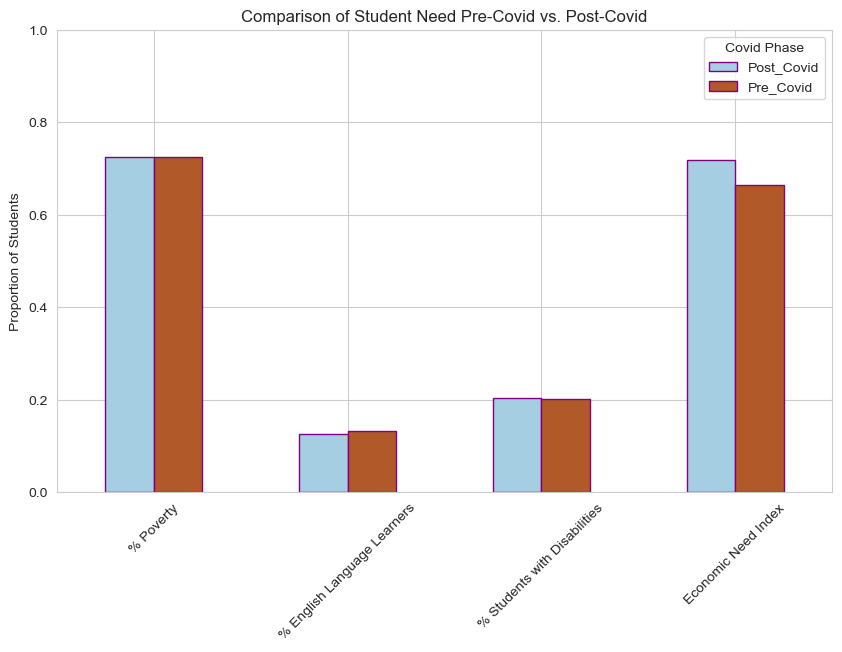

In [733]:
# Convert columns to numeric
cols_to_convert = ['% Poverty', '% English Language Learners', '% Students with Disabilities', 'Economic Need Index']
for col in cols_to_convert:
    demo_df[col] = pd.to_numeric(demo_df[col], errors = 'coerce')

# Label years as pre- or post-Covid
def label_covid_phase(year):
    if year in ['2015-16', '2016-17', '2017-18', '2018-19']:
        return 'Pre_Covid'
    elif year in ['2019-20', '2020-21']:
        return 'Post_Covid'
    else: 
        return 'Unknown'
    
demo_df['Covid Phase'] = demo_df['Year'].apply(label_covid_phase)

# Group by Covid Phase and calculate mean of key indicators
student_need = demo_df.groupby('Covid Phase')[cols_to_convert].mean().reset_index()
student_need.set_index('Covid Phase', inplace=True)

# Plot
student_need.T.plot(kind='bar', figsize=(10,6), colormap='Paired', edgecolor='purple')
plt.title('Comparison of Student Need Pre-Covid vs. Post-Covid')
plt.ylabel('Proportion of Students')
plt.ylim(0, 1)
plt.xticks(rotation=45)
plt.legend(title='Covid Phase')
plt.tight_layout
plt.show()

After Covid, student need either remained high or increased. 
* Economic Need increased Post-Covid
* Students with disabilities and ELL student remained elevated
* The number of students living in poverty remained high

These trends show that student performance declined after Covid because schools were serving hybrid and remote learners; and on top of that already challenging situation, schools were trying to meet the needs of children who had complex academic and social-emotional needs. 

## 3. Graduation Results

### Import Data

In [734]:
# Load DataFrame
grad_df = pd.read_csv("/Users/sa18/Desktop/Education-Capstone/data/Graduation_results_for_Cohorts_2012_to_2019__Classes_of_2016_to_2023__20250609.csv")

In [735]:
grad_df.shape

(1130, 29)

This dataset has 29 rows and 1,130 columns.

In [736]:
grad_df.head()

,Report Category,Geographic Subdivision,School Name,Category,Cohort Year,Cohort,# Total Cohort,# Grads,% Grads,# Total Regents,...,% Local of Cohort,% Local of Grads,# Still Enrolled,% Still Enrolled,# Dropout,% Dropout,# SACC (IEP Diploma),% SACC (IEP Diploma) of Cohort,# TASC (GED),% TASC (GED) of Cohort
0,Citywide,Citywide,NaN,All Students,2019,4 year August,69893,58503,83.7,58295,...,0.3,0.4,6773,9.7,3748,5.4,260,0.4,569,0.8
1,Citywide,Citywide,NaN,All Students,2018,4 year August,70912,59374,83.7,59110,...,0.4,0.4,6808,9.6,3831,5.4,322,0.5,547,0.8
2,Citywide,Citywide,NaN,All Students,2017,4 year August,72663,60055,82.6,59683,...,0.5,0.6,8225,11.3,3545,4.9,227,0.3,566,0.8
3,Citywide,Citywide,NaN,All Students,2016,4 year August,73565,58704,79.8,57734,...,1.3,1.7,9385,12.8,4338,5.9,269,0.4,852,1.2
4,Citywide,Citywide,NaN,All Students,2015,4 year August,73772,57035,77.3,51848,...,7,9.1,9979,13.5,5745,7.8,317,0.4,692,0.9


In [737]:
grad_df.columns

Index(['Report Category', 'Geographic Subdivision', 'School Name', 'Category',
       'Cohort Year', 'Cohort', '# Total Cohort', '# Grads', '% Grads',
       '# Total Regents', '% Total Regents of Cohort',
       '% Total Regents of Grads', '# Advanced Regents',
       '% Advanced Regents of Cohort', '% Advanced Regents of Grads',
       '# Regents without Advanced', '% Regents without Advanced of Cohort',
       '% Regents without Advanced of Grads', '# Local', '% Local of Cohort',
       '% Local of Grads', '# Still Enrolled', '% Still Enrolled', '# Dropout',
       '% Dropout', '# SACC (IEP Diploma)', '% SACC (IEP Diploma) of Cohort',
       '# TASC (GED)', '% TASC (GED) of Cohort'],
      dtype='object')

In [738]:
grad_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1130 entries, 0 to 1129
Data columns (total 29 columns):
 #   Column                                Non-Null Count  Dtype  
---  ------                                --------------  -----  
 0   Report Category                       1130 non-null   object 
 1   Geographic Subdivision                1130 non-null   object 
 2   School Name                           0 non-null      float64
 3   Category                              1130 non-null   object 
 4   Cohort Year                           1130 non-null   int64  
 5   Cohort                                1130 non-null   object 
 6   # Total Cohort                        1130 non-null   int64  
 7   # Grads                               1130 non-null   object 
 8   % Grads                               1130 non-null   object 
 9   # Total Regents                       1130 non-null   object 
 10  % Total Regents of Cohort             1130 non-null   object 
 11  % Total Regents o

In [739]:
grad_df.isnull().sum()

Report Category                            0
Geographic Subdivision                     0
School Name                             1130
Category                                   0
Cohort Year                                0
Cohort                                     0
# Total Cohort                             0
# Grads                                    0
% Grads                                    0
# Total Regents                            0
% Total Regents of Cohort                  0
% Total Regents of Grads                   0
# Advanced Regents                         0
% Advanced Regents of Cohort               0
% Advanced Regents of Grads                0
# Regents without Advanced                 0
% Regents without Advanced of Cohort       0
% Regents without Advanced of Grads        0
# Local                                    0
% Local of Cohort                          0
% Local of Grads                           0
# Still Enrolled                           0
% Still En

`School Name` has no info. It will be removed, since it does not serve any data-related purpose.

In [740]:
grad_df.describe()

,School Name,Cohort Year,# Total Cohort
count,0.0,1130.000000,1130.000000
mean,NaN,2015.183186,18619.454867
std,NaN,2.148409,20351.068315
min,NaN,2012.000000,1.000000
25%,NaN,2013.000000,5078.250000
50%,NaN,2015.000000,10498.500000
75%,NaN,2017.000000,28566.750000
max,NaN,2019.000000,74948.000000


In [741]:
grad_df.duplicated().sum()

0

In [742]:
grad_df.nunique()

Report Category                            1
Geographic Subdivision                     1
School Name                                0
Category                                  36
Cohort Year                                8
Cohort                                     5
# Total Cohort                           611
# Grads                                 1031
% Grads                                  364
# Total Regents                         1032
% Total Regents of Cohort                400
% Total Regents of Grads                 186
# Advanced Regents                       787
% Advanced Regents of Cohort             395
% Advanced Regents of Grads              514
# Regents without Advanced               996
% Regents without Advanced of Cohort     361
% Regents without Advanced of Grads      434
# Local                                  618
% Local of Cohort                        147
% Local of Grads                         186
# Still Enrolled                         856
% Still En